These two pages explain how to get your Chrome history on your computer:
    
https://superuser.com/questions/602252/can-chrome-browser-history-be-exported-to-an-html-file
    
https://yuji.wordpress.com/2014/03/10/export-chrome-history-as-csv-spreadsheet/

In [1]:
#!cp /Users/benpayne/Library/Application Support/Google/Chrome/Default/History .

A good tutorial on how to load SQL into Pandas

https://www.dataquest.io/blog/python-pandas-databases/

The official documentation is

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_sql.html

https://pandas.pydata.org/pandas-docs/stable/io.html#sqlite-fallback

In [2]:
import pandas
import sqlite3
pandas.__version__

'0.23.4'

In [3]:
conn = sqlite3.connect("History")
hist_df = pandas.read_sql_query("SELECT datetime(last_visit_time/1000000-11644473600,'unixepoch','localtime'), url FROM urls ORDER BY last_visit_time DESC;", conn)
hist_df.columns=['date_time','url']
hist_df.head()

,date_time,url
0,2018-09-08 09:34:41,https://www.facebook.com/
1,2018-09-08 09:32:21,https://news.ycombinator.com/item?id=17936860
2,2018-09-08 09:32:10,https://news.ycombinator.com/item?id=17938262
3,2018-09-08 09:32:01,https://www.messenger.com/t/2122176331133910
4,2018-09-08 09:32:01,https://www.messenger.com/


In [ ]:
hist_df

In [5]:
hist_df.dtypes

date_time    object
url          object
dtype: object

For timestamp format, see 
http://strftime.org/

In [6]:
hist_df['date_time'] = pandas.to_datetime(hist_df['date_time'],
                                          format='%Y-%m-%d %H:%M:%S',
                                          errors='coerce')
#,infer_datetime_format=True)
#)

In [ ]:
hist_df

how many entries are missing a timestamp?

In [8]:
pandas.isnull(hist_df['date_time']).sum()

74

In [9]:
import matplotlib.pyplot as plt

Source:
https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

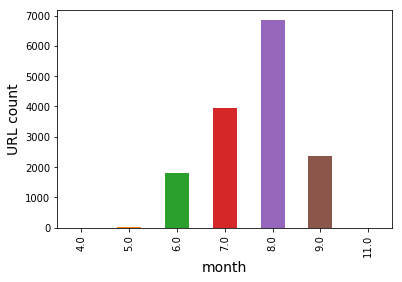

In [10]:
hist_df["date_time"].groupby(hist_df["date_time"].dt.month).count().plot(kind="bar")
plt.xlabel('month', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.show()

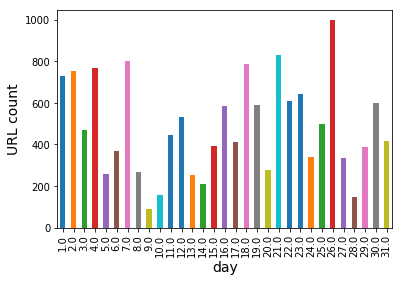

In [11]:
hist_df["date_time"].groupby(hist_df["date_time"].dt.day).count().plot(kind="bar")
plt.xlabel('day', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.show()

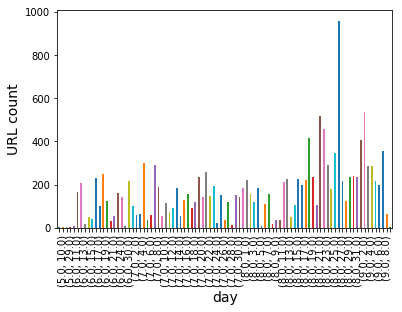

In [12]:
hist_plot = hist_df["date_time"].groupby([hist_df["date_time"].dt.month, hist_df["date_time"].dt.day]).count().plot(kind="bar")
# https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
for label in hist_plot.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xlabel('day', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.show()

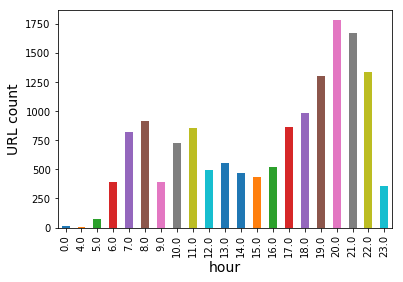

In [13]:
hist_df["date_time"].groupby(hist_df["date_time"].dt.hour).count().plot(kind="bar")
plt.xlabel('hour', fontsize=14)
plt.ylabel('URL count', fontsize=14)
plt.show()